# FDA Drug Recall Enforcement Database & Data Analysis

Import the data first:

```shell
mongoimport --type csv -d recall_data_for_sql -c recall_list --headerline --drop recall_data_for_sql.csv
```

In [1]:
from pymongo import MongoClient

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [5]:
# confirm that our new database was created
print(mongo.list_database_names())

['ClassDB', 'FruitDB', 'Fruits_db', 'admin', 'autosaurus', 'config', 'db', 'epa', 'local', 'met', 'recall_data_for_sql', 'test_database', 'travel_db', 'uk_food']


In [12]:
# assign the database to a variable name
db = mongo['recall_data_for_sql']

In [13]:
# review the collections in our new database
print(db.list_collection_names())

['recall_list']


In [14]:
# review a document in the customer_list collection
print(db.recall_list.find_one())

{'_id': ObjectId('65f8f13d2375e4636adcdee1'), 'Event_ID': 72241, 'Recalling_Firm': 'Kalman Health & Wellness, Inc. dba Essential Wellness Pharma', 'Substance_Name': "['na']", 'Product_Description': 'Progesterone 100 mg/mL in Corn Oil Injection, 2 mL vials, Rx only, Essential Wellness PHARMACY, 4625 N. University, Peoria, IL 61614.', 'Ingestion_Route': 'na', 'Reason': 'Lack of Assurance of Sterility', 'Classification': 'Class II', 'Quantity': '1 vial', 'Voluntary_Mandated': 'Voluntary: Firm initiated', 'Distribution': 'Nationwide', 'Initial_Notification_Method': 'Letter', 'Recall_Begins': '9/3/2015', 'Recall_End': '12/29/2017', 'Status': 'Terminated', 'City': 'Peoria', 'State': 'IL', 'Postal_Code': '61614-5828', 'Country': 'United States'}


In [15]:
# assign the collection to a variable
recall_list = db['recall_list']

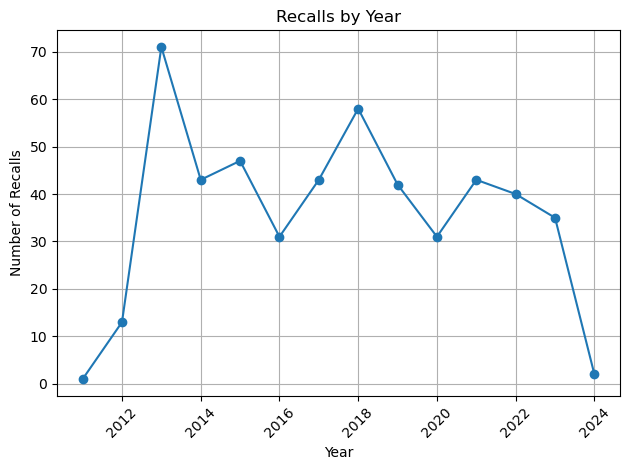

In [16]:
import pymongo
import matplotlib.pyplot as plt

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["recall_data_for_sql"]
collection = db["recall_list"]

# MongoDB aggregation pipeline to group recalls by year
pipeline = [
    {
        "$group": {
            "_id": {"$year": {"$dateFromString": {"dateString": "$Recall_Begins"}}},
            "count": {"$sum": 1}
        }
    },
    {"$sort": {"_id": 1}}
]

# Execute the aggregation pipeline
cursor = collection.aggregate(pipeline)

# Extract data for plotting
years = []
counts = []
for doc in cursor:
    years.append(doc["_id"])
    counts.append(doc["count"])

# Plot the trend line
plt.plot(years, counts, marker='o')
plt.title('Recalls by Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


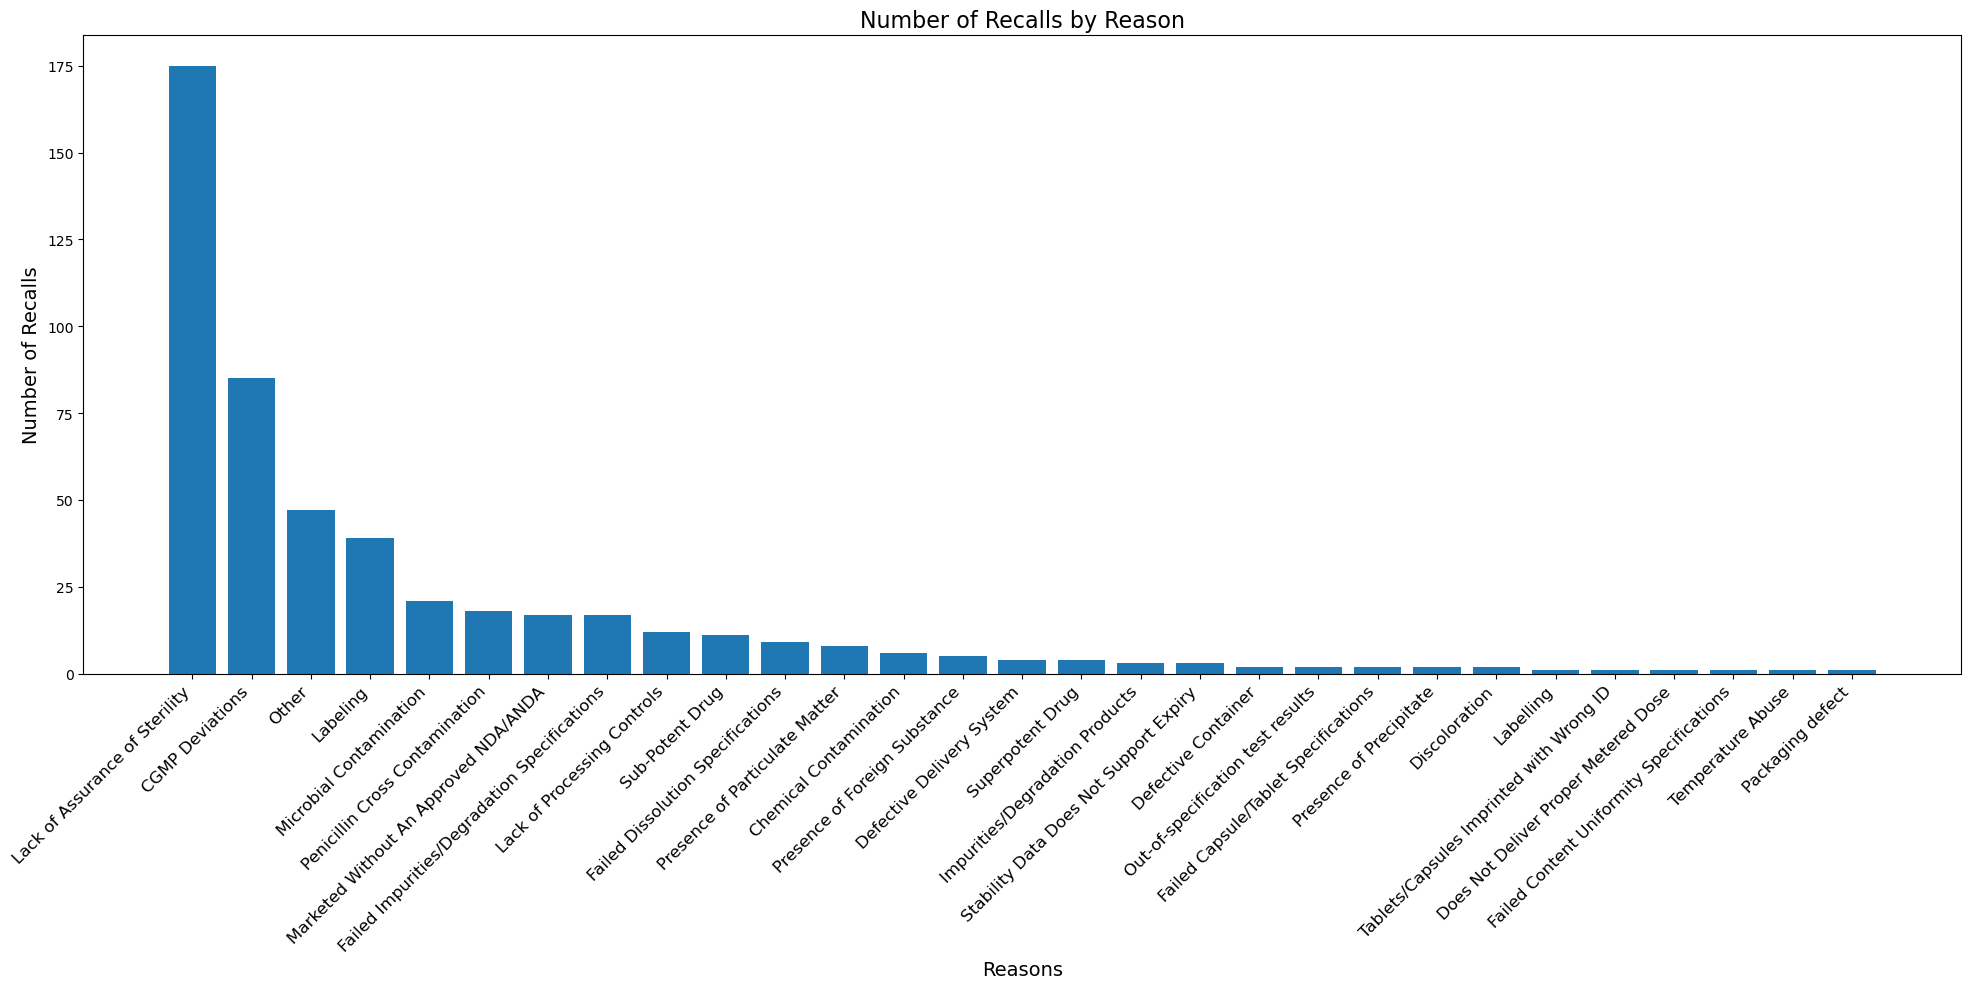

In [10]:
import pymongo
import matplotlib.pyplot as plt

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["recall_data_for_sql"]
collection = db["recall_list"]

# Define mapping of reasons to groups
reason_groups = {
    "Reason Group 1": ["Reason 1", "Reason 2", "Reason 3"],
    "Reason Group 2": ["Reason 4", "Reason 5"]
    # Add more mappings as needed
}

# MongoDB aggregation pipeline to group recalls by reason
pipeline = [
  {
    "$project": {
      "ReasonGroup": {
        "$switch": {
          "branches": [
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Lack of Assurance of Sterility).*"}}, "then": "Lack of Assurance of Sterility"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(CGMP Deviations).*"}}, "then": "CGMP Deviations"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Presence of Particulate Matter).*"}}, "then": "Presence of Particulate Matter"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Penicillin Cross Contamination).*"}}, "then": "Penicillin Cross Contamination"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Temperature Abuse).*"}}, "then": "Temperature Abuse"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Presence of Foreign Substance).*"}}, "then": "Presence of Foreign Substance"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Failed Content Uniformity Specifications).*"}}, "then": "Failed Content Uniformity Specifications"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Defective Container).*"}}, "then": "Defective Container"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Failed Dissolution Specifications).*"}}, "then": "Failed Dissolution Specifications"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Marketed Without An Approved NDA/ANDA).*"}}, "then": "Marketed Without An Approved NDA/ANDA"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Discoloration).*"}}, "then": "Discoloration"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Lack of Processing Controls).*"}}, "then": "Lack of Processing Controls"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Failed Impurities/Degradation Specifications).*"}}, "then": "Failed Impurities/Degradation Specifications"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Failed Capsule/Tablet Specifications).*"}}, "then": "Failed Capsule/Tablet Specifications"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Microbial Contamination).*"}}, "then": "Microbial Contamination"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Tablets/Capsules Imprinted with Wrong ID).*"}}, "then": "Tablets/Capsules Imprinted with Wrong ID"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Stability Data Does Not Support Expiry).*"}}, "then": "Stability Data Does Not Support Expiry"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Chemical Contamination).*"}}, "then": "Chemical Contamination"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Defective Delivery System).*"}}, "then": "Defective Delivery System"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Presence of Precipitate).*"}}, "then": "Presence of Precipitate"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Does Not Deliver Proper Metered Dose).*"}}, "then": "Does Not Deliver Proper Metered Dose"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Superpotent Drug).*"}}, "then": "Superpotent Drug"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Out-of-specification test results).*"}}, "then": "Out-of-specification test results"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Sub-Potent Drug).*"}}, "then": "Sub-Potent Drug"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Impurities/Degradation Products).*"}}, "then": "Impurities/Degradation Products"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labeling).*"}}, "then": "Labeling"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Packaging defect).*"}}, "then": "Packaging defect"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labeling Incorrect Instructions).*"}}, "then": "Labeling Incorrect Instructions"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labeling; Label Mix-up).*"}}, "then": "Labeling; Label Mix-up"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labelling).*"}}, "then": "Labelling"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labeling -label error on declared strength).*"}}, "then": "Labeling -label error on declared strength"},
            {"case": {"$regexMatch": {"input": "$Reason", "regex": ".*(Labeling; Incorrect or Missing Lot and/or Exp Date).*"}}, "then": "Labeling; Incorrect or Missing Lot and/or Exp Date"}
          ],
          "default": "Other"
        }
      }
    }
  },
  {
    "$group": {
      "_id": "$ReasonGroup",
      "count": { "$sum": 1 }
    }
  }
]


# Execute the aggregation pipeline
cursor = collection.aggregate(pipeline)

# Extract data for plotting
reason_groups = []
counts = []
for doc in cursor:
    reason_groups.append(doc["_id"])
    counts.append(doc["count"])

# Sort reason_groups and counts based on counts in descending order
reason_groups, counts = zip(*sorted(zip(reason_groups, counts), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(20, 10))  
plt.bar(reason_groups, counts)

# Adjusting the appearance of the plot
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=10)  
plt.xlabel('Reasons', fontsize=14)  
plt.ylabel('Number of Recalls', fontsize=14)  
plt.title('Number of Recalls by Reason', fontsize=16)  
plt.tight_layout() 
plt.show()

